# Lets-Plot in 2021

## Preparation


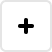
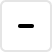
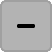
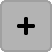
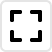
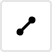
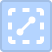
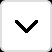
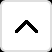
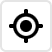

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
WINTER_PALETTE = {
    'cold': ['#ffffff', '#97b7d8', '#4177a1', '#172540'],
    'warm': ['#fdd0a2', '#fdae6b', '#f16913', '#d94801'],
}

In [3]:
def winter_theme(tiles=False):
    winter_line_light = element_line(color=WINTER_PALETTE['cold'][1])
    winter_line_dark = element_line(color=WINTER_PALETTE['cold'][3])
    winter_text = element_text(color=WINTER_PALETTE['cold'][3])
    return theme_none() + theme(
        axis_line_x=(winter_line_dark if not tiles else 'blank'),
        axis_line_y='blank',
        axis_ticks=winter_line_light,
        axis_text=winter_text,
        axis_title=winter_text,
        line=winter_line_light,
        rect=element_rect(color=WINTER_PALETTE['cold'][1], fill=WINTER_PALETTE['cold'][0]),
        panel_background=(None if not tiles else 'blank'),
        text=winter_text,
        panel_grid=(winter_line_light if not tiles else 'blank'),
        panel_grid_minor='blank',
        axis_tooltip=element_rect(color=WINTER_PALETTE['cold'][0], fill=WINTER_PALETTE['cold'][3])
    )

In [4]:
def style_getter(d):
    def style(keys=None):
        if not keys:
            return d
        if type(keys) is list:
            return {k: v for k, v in d.items() if k in keys}
        else:
            return d[keys] if keys in d.keys() else d
    return style

def geom_style(keys=None, is_point=False):
    style = {
        'color': WINTER_PALETTE['warm'][2],
        'fill': WINTER_PALETTE['warm'][1],
        'outlier_color': WINTER_PALETTE['warm'][2],
        'outlier_fill': WINTER_PALETTE['warm'][1],
        'shape': 21,
        'size': 3 if is_point else 1,
        'outlier_shape': 21,
        'outlier_size': 3,
    }
    return style_getter(style)(keys)

def scale_continuous_style(keys=None):
    return style_getter({
        'low': WINTER_PALETTE['warm'][0],
        'high': WINTER_PALETTE['warm'][3],
    })(keys)

In [5]:
def plot_size(size_type=None):
    if size_type == 'big':
        return ggsize(720, 540)
    return ggsize(600, 450)

In [6]:
def get_data(path_to_csv):
    from datetime import datetime

    EXTENSIONS_TOP_SIZE = 3

    df = pd.read_csv(path_to_csv)
    df = df[df.extension.isin(df.extension.value_counts().iloc[:EXTENSIONS_TOP_SIZE].index)]
    df.creation_date = pd.to_datetime(df.creation_date)
    df.modification_date = pd.to_datetime(df.modification_date)
    df = df[df.creation_date >= datetime(2021, 1, 1)]

    return df.reset_index(drop=True)

In [7]:
def dt_breaks(df, dt_column, breaks_count=5):
    import numpy as np

    return pd.to_datetime(np.linspace(
        df[dt_column].min().value,
        df[dt_column].max().value,
        breaks_count
    )).round('1s').to_list()

In [8]:
df = get_data("../data/lets-plot_2.2.1.csv")
print(df.shape)
df.head()

(389, 12)


filename                                          directory  \
0      DomEventMapper  base/src/jsMain/kotlin/jetbrains/datalore/base...   
1      DateTimeFormat  base-portable/src/commonMain/kotlin/jetbrains/...   
2     EventHandlerExt  base-portable/src/commonMain/kotlin/jetbrains/...   
3  AdaptiveResampling  base-portable/src/commonMain/kotlin/jetbrains/...   
4          Transforms  base-portable/src/commonMain/kotlin/jetbrains/...   

  extension  lines_count  words_count  symbols_count  commits_count  \
0        kt          110          330           4011              1   
1        kt          130          443           5221              3   
2        kt           15           51            431              1   
3        kt           83          276           2381              1   
4        kt          107          320           3611              1   

   authors_count       creation_date creation_author   modification_date  \
0              1 2021-09-28 22:47:31   I. Kupriyanov 2021-09-28 22:47:31   
1              1 2021-08-18 00:34:33    O. Larionova 2021-11-25 13:06:51   
2              1 2021-09-27 22:29:05   I. Kupriyanov 2021-09-27 22:29:05   
3              1 2021-08-23 14:01:25   I. Kupriyanov 2021-08-23 14:01:25   
4              1 2021-08-23 14:01:25   I. Kupriyanov 2021-08-23 14:01:25   

  modification_author  
0       I. Kupriyanov  
1        O. Larionova  
2       I. Kupriyanov  
3       I. Kupriyanov  
4       I. Kupriyanov

The data comes from the [lets-plot repo](https://github.com/JetBrains/lets-plot), each row provides information about a project file.

Some extra information was extracted using Git:

- `commits_count` - the number of commits corresponding to the file (according to the `git log` command);
- `authors_count` - the total number of different authors;
- `creation_date` - the date and time of the commit in which the file appeared;
- `creation_author` - the author of the commit in which the file appeared;
- `modification_date` - the date and time of the last commit corresponding to the file;
- `modification_author` - the author of the last commit corresponding to the file.

## Lets-Plot files exploration

In [9]:
ggplot(df, aes(as_discrete("extension", order_by='..count..'))) + \
    geom_bar(**geom_style()) + \
    scale_y_log10() + \
    ylab("number of files (log)") + \
    ggtitle("Number of project files by extension") + \
    winter_theme() + \
    plot_size()

Obviously, most Lets-Plot files are written in Kotlin.

In [10]:
ggplot(df, aes(as_discrete("extension", order_by="..middle.."), "words_count")) + \
    geom_boxplot(**geom_style()) + \
    scale_y_log10() + \
    ylab("number of words (log)") + \
    ggtitle("Number of words per file") + \
    winter_theme() + \
    plot_size()

In [11]:
ggplot(df, aes(as_discrete("extension", order_by="..middle.."), "commits_count")) + \
    geom_boxplot(**geom_style()) + \
    scale_y_log10() + \
    ylab("number of commits (log)") + \
    ggtitle("Number of commits per file") + \
    winter_theme() + \
    plot_size()

In [12]:
ggplot(df, aes(x=as_discrete("creation_author", label="author", order_by='..count..'))) + \
    geom_bar(**geom_style()) + \
    ylab("number of files created") + \
    ggtitle("Number of project files by creators") + \
    winter_theme() + \
    plot_size('big')

The undisputed leader in creating new files for the project in 2021 is Ivan Kupriyanov.

In [13]:
ggplot(df, aes("creation_author", "extension")) + \
    geom_bin2d(color=scale_continuous_style('high'), size=geom_style('size')) + \
    scale_fill_gradient(name="number of files (log)", trans='log10', **scale_continuous_style()) + \
    xlab("file creator") + \
    ggtitle("Popularity of extensions among authors") + \
    winter_theme(tiles=True) + \
    plot_size('big')

In [14]:
ggplot(df, aes("authors_count", "commits_count")) + \
    geom_bin2d(binwidth=(1, 5), color=scale_continuous_style('high'), size=geom_style('size')) + \
    coord_fixed(ratio=.2) + \
    scale_x_continuous(breaks=list(range(5))) + \
    scale_fill_gradient(name="number of files (log)", trans='log10', **scale_continuous_style()) + \
    xlab("number of authors") + ylab("number of commits") + \
    ggtitle("Correlation between numbers of authors and commits") + \
    winter_theme(tiles=True) + \
    plot_size()

Most of the files have been created or edited by a small number of authors, not too many times.

In [15]:
ggplot(df[(df.authors_count > 3)|(df.commits_count >= 10)], \
       aes("lines_count", "words_count")) + \
    geom_point(aes(fill="extension", size="symbols_count"), \
               color='black', shape=21, alpha=.7, \
               tooltips=layer_tooltips().line("@{directory}@filename.@extension")\
                                        .line("lines number|@lines_count")\
                                        .line("words number|@words_count")\
                                        .line("symbols number|@symbols_count")\
                                        .line("commits number|@commits_count")\
                                        .line("authors number|@authors_count")\
                                        .line("creator|@creation_author")\
                                        .line("most recent commit author|@modification_author")\
                                        .anchor('bottom_center')) + \
    scale_x_log10() + scale_y_log10() + \
    scale_fill_brewer(type='qual', palette='Pastel1') + \
    scale_size(trans='log10', guide='none') + \
    xlim(32, 1024) + ylim(64, 4096) + \
    xlab("number of lines (log)") + ylab("number of words (log)") + \
    ggtitle("Most popular files (with the largest number of authors or commits)") + \
    winter_theme() + \
    plot_size('big')

Among the files that have often been edited, the biggest one is the `python-package/lets_plot/geo_data/geocoder.py`.

Obviously, there is a correlation between the number of lines and the number of words in the file.

In [16]:
ggplot(df[df.creation_date == df.modification_date], \
       aes("creation_author", "words_count", fill="creation_author")) + \
    geom_violin(size=geom_style('size')) + \
    geom_boxplot(size=geom_style('size'), fill='white', width=.2) + \
    facet_grid(x="extension") + \
    coord_flip() + \
    scale_y_log10(breaks=[2**n for n in range(5, 12)]) + \
    scale_fill_brewer(type='qual', palette='Pastel1', guide='none') + \
    xlab("creator") + ylab("number of words (log)") + \
    ggtitle("Files that never changed after they were created") + \
    winter_theme() + \
    plot_size('big')

If we look at the files that have never been changed after they were created, we will see that those are mostly Kotlin files and are usually not too big.

In [17]:
ggplot(df.sort_values(by="creation_date").groupby("creation_date").count().iloc[:, 0].cumsum()\
         .to_frame("count").reset_index(), aes("creation_date", "count")) + \
    geom_area(stat="identity",
              tooltips=layer_tooltips().line("files count|^y")\
                                       .format("@creation_date", "%m/%d/%Y")\
                                       .line("creation date|^x"),
              **geom_style()) + \
    scale_x_datetime(breaks=dt_breaks(df, 'creation_date'), format='%b %Y') + \
    xlab("file creation date") + ylab("number of files") + \
    ggtitle("Increasing number of new files in 2021") + \
    winter_theme() + \
    plot_size('big')